In [1]:
import os,sys
sys.path.append(os.path.abspath('../../Software/rate_analysis/'))
import rate_methods as RM
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize, stats
import seaborn as sns
import json

## Figure 3: Protein G Single-CV Rates

In [2]:
true = 1.4328652141523972
pace = [100,1000,1e4,2e4,5e4,1e5,5e5,1e6]

# WT RMSD
with open('../Rates/rates_R_wt.json','r') as f:
    R_rates_data = json.load(f)

# UT RMSD
with open('../Rates/rates_R_ut.json','r') as f:
    R_rates_data_u = json.load(f)
    
# WT Fraction of Native Contacts
with open('../Rates/rates_Q_wt.json','r') as f:
    Q_rates_data = json.load(f)
    
# UT Fraction of Native Contacts
with open('../Rates/rates_Q_ut.json','r') as f:
    Q_rates_data_u = json.load(f)

# WT LD1
with open('../Rates/rates_L_wt.json','r') as f:
    L_rates_data = json.load(f)
    
# WT Radius of Gyration
with open('../Rates/rates_G_wt.json','r') as f:
    G_rates_data = json.load(f)
    
# UT Radius of Gyration
with open('../Rates/rates_G_ut.json','r') as f:
    G_rates_data_u = json.load(f)
    
# WT End-to-End Distance
with open('../Rates/rates_E_wt.json','r') as f:
    E_rates_data = json.load(f)
    
# UT End-to-End Distance
with open('../Rates/rates_E_ut.json','r') as f:
    E_rates_data_u = json.load(f)

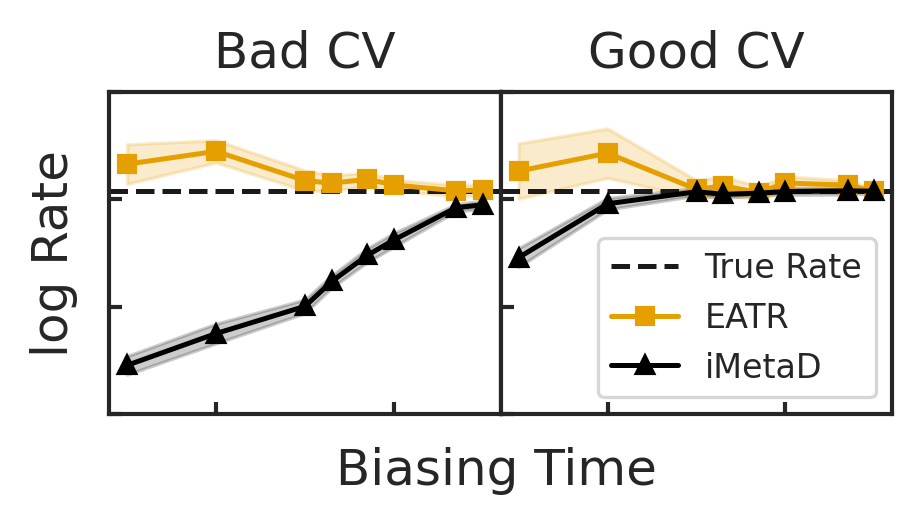

In [3]:
sns.set_theme()
sns.set_style('ticks')
sns.set_context('paper', rc={'axes.labelsize': 12, 'axes.linewidth': 1.0, 'lines.linewidth': 1.2, 'axes.titlesize': 12,
                             'xtick.labelsize': 8, 'ytick.labelsize': 8, 'xtick.major.width': 1.0, 'ytick.major.width': 1.0,
                             'legend.fontsize': 8, 'legend.framealpha': 0, 'lines.markersize': 4})

fig, axs = plt.subplots(1,2,figsize=(3,1.6),dpi=300,sharey='row',sharex=True)
fig.subplots_adjust(wspace=0,top=0.85,bottom=0.18,left=0.10,right=0.97)

paces = np.array(pace)/100

# Rates

axs[0].set_ylabel('log Rate')
axs[0].set_xticks([1,3],labels=['',''])
#axs[1].set_xticks([1,3],labels=['',''])
axs[0].set_yticks([-4,-2,0,2],labels=['','','',''])
#axs[0].set_xscale('log')
#axs[0].set_xlim((5.62e-1,1.78e4))
axs[0].set_ylim((-4,2))

axs[0].axhline(y=np.log10(true),color='k',linestyle='--')
axs[0].plot(np.log10(paces),np.log10(np.array(E_rates_data["EATR CDF k"])*1e6),marker='s',color='#E69F00')
axs[0].fill_between(np.log10(paces),np.log10(np.array(E_rates_data["EATR CDF k"])*1e6)-E_rates_data["EATR CDF std k"],np.log10(np.array(E_rates_data["EATR CDF k"])*1e6)+E_rates_data["EATR CDF std k"],color='#E69F00',alpha=0.2)
axs[0].plot(np.log10(paces),np.log10(np.array(E_rates_data["iMetaD CDF k"])*1e6),marker='^',color='#000000')
axs[0].fill_between(np.log10(paces),np.log10(np.array(E_rates_data["iMetaD CDF k"])*1e6)-E_rates_data["iMetaD CDF std k"],np.log10(np.array(E_rates_data["iMetaD CDF k"])*1e6)+E_rates_data["iMetaD CDF std k"],color='#000000',alpha=0.2)
axs[0].set_title('Bad CV')

axs[1].axhline(y=np.log10(true),color='k',linestyle='--',label='True Rate')
axs[1].plot(np.log10(paces),np.log10(np.array(Q_rates_data["EATR CDF k"])*1e6),marker='s',color='#E69F00',label='EATR')
axs[1].fill_between(np.log10(paces),np.log10(np.array(Q_rates_data["EATR CDF k"])*1e6)-Q_rates_data["EATR CDF std k"],np.log10(np.array(Q_rates_data["EATR CDF k"])*1e6)+Q_rates_data["EATR CDF std k"],color='#E69F00',alpha=0.2)
axs[1].plot(np.log10(paces),np.log10(np.array(Q_rates_data["iMetaD CDF k"])*1e6),marker='^',color='#000000',label='iMetaD')
axs[1].fill_between(np.log10(paces),np.log10(np.array(Q_rates_data["iMetaD CDF k"])*1e6)-Q_rates_data["iMetaD CDF std k"],np.log10(np.array(Q_rates_data["iMetaD CDF k"])*1e6)+Q_rates_data["iMetaD CDF std k"],color='#000000',alpha=0.2)
axs[1].set_title('Good CV')
axs[1].legend(loc='lower right')

#fig.add_subplot(111, frameon=False)
#plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

for ax in axs.flatten():
    ax.tick_params(axis='both', direction='in', which='both', length=3)
axs[0].set_xlabel('Biasing Time')
axs[0].xaxis.set_label_coords(0.99,-0.1)

plt.savefig("EATR_TOC.pdf",format='pdf')

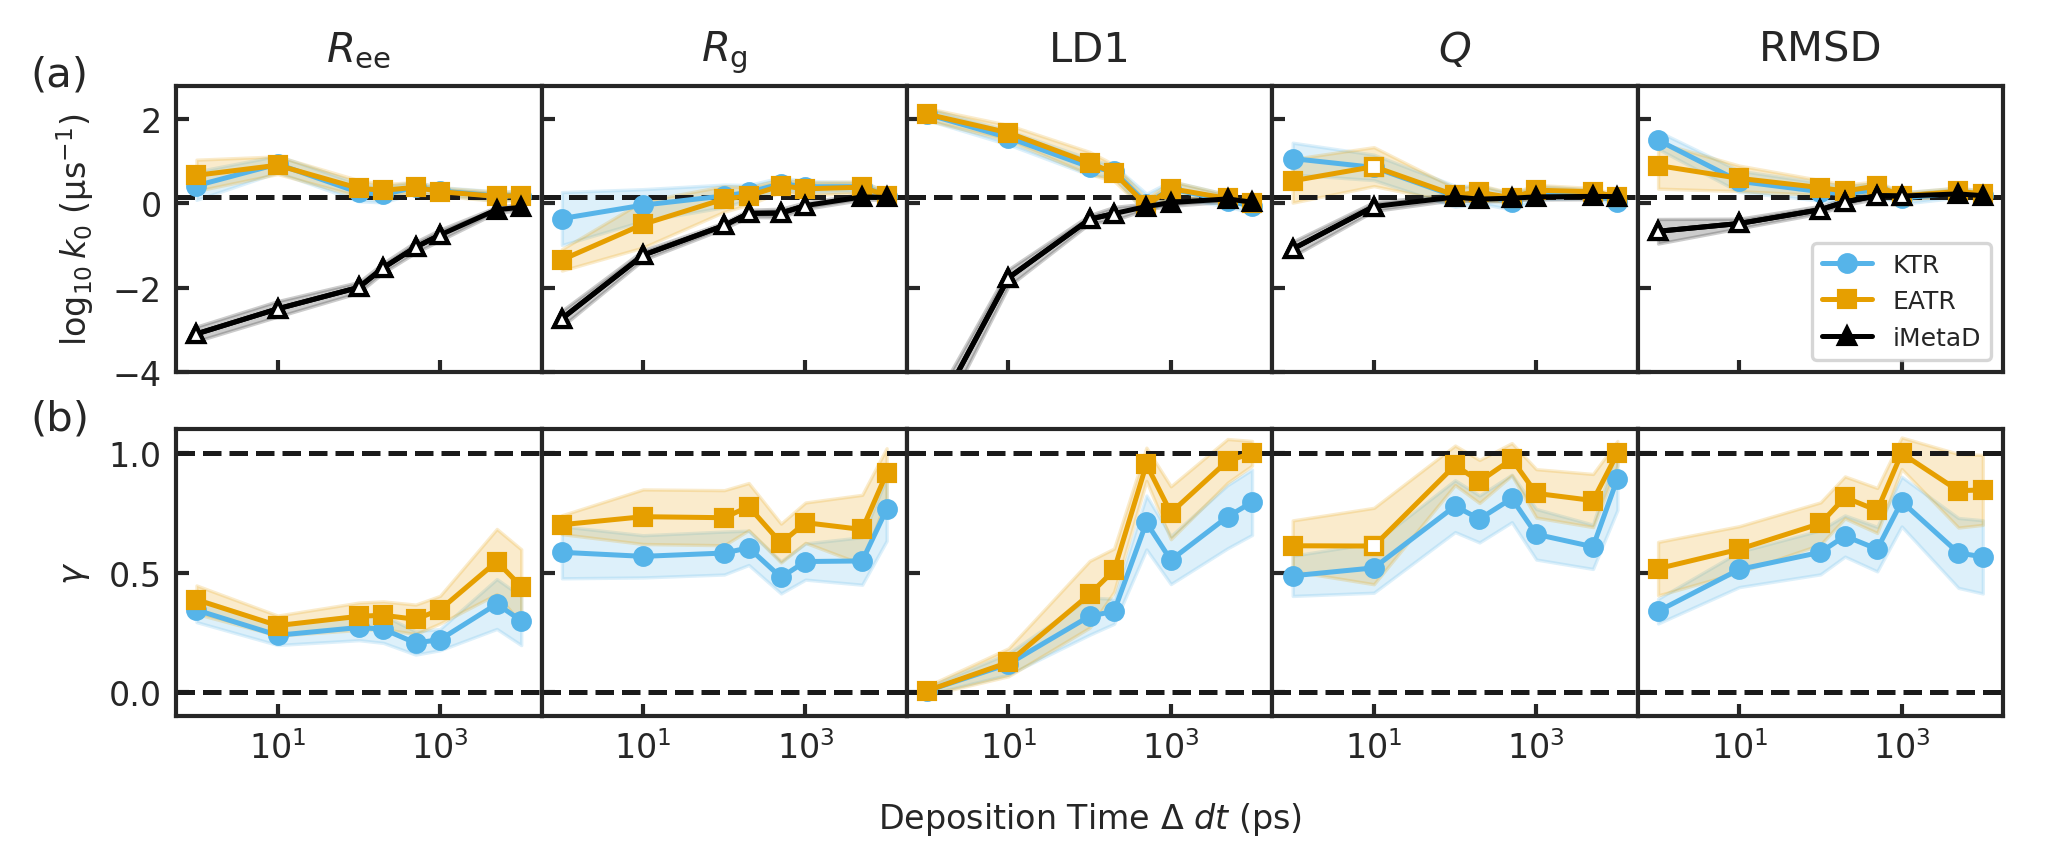

In [4]:
sns.set_theme()
sns.set_style('ticks')
sns.set_context('paper', rc={'axes.labelsize': 8, 'axes.linewidth': 1.0, 'lines.linewidth': 1.2, 'axes.titlesize': 10,
                             'xtick.labelsize': 8, 'ytick.labelsize': 8, 'xtick.major.width': 1.0, 'ytick.major.width': 1.0,
                             'legend.fontsize': 6, 'legend.framealpha': 0, 'lines.markersize': 4})

fig, axs = plt.subplots(2,5,figsize=(7,3),dpi=300,sharey='row',sharex=True)
fig.subplots_adjust(wspace=0,bottom=0.18,left=0.10,right=0.97)

paces = np.array(pace)/100

# Rates

axs[0,0].set_ylabel('$\log_{10} k_0$ ($\mathrm{\mu s}^{-1}$)')
axs[0,0].set_yticks([-4,-2,0,2])
axs[0,0].set_xscale('log')
axs[0,0].set_xlim((5.62e-1,1.78e4))
axs[0,0].set_ylim((-4,np.log10(600)))
axs[0,0].text(-0.4,1.0,"(a)",fontsize=10,transform=axs[0,0].transAxes)

axs[0,0].axhline(y=np.log10(true),color='k',linestyle='--')
axs[0,0].plot(paces,np.log10(np.array(E_rates_data["KTR Vmb CDF k"])*1e6),marker='o',markersize=4,color='#56B4E9')
axs[0,0].fill_between(paces,np.log10(np.array(E_rates_data["KTR Vmb CDF k"])*1e6)-E_rates_data["KTR Vmb CDF std k"],np.log10(np.array(E_rates_data["KTR Vmb CDF k"])*1e6)+E_rates_data["KTR Vmb CDF std k"],color='#56B4E9',alpha=0.2)
axs[0,0].plot(paces,np.log10(np.array(E_rates_data["EATR CDF k"])*1e6),marker='s',color='#E69F00')
axs[0,0].fill_between(paces,np.log10(np.array(E_rates_data["EATR CDF k"])*1e6)-E_rates_data["EATR CDF std k"],np.log10(np.array(E_rates_data["EATR CDF k"])*1e6)+E_rates_data["EATR CDF std k"],color='#E69F00',alpha=0.2)
axs[0,0].plot(paces,np.log10(np.array(E_rates_data["iMetaD CDF k"])*1e6),marker='^',color='#000000')
axs[0,0].fill_between(paces,np.log10(np.array(E_rates_data["iMetaD CDF k"])*1e6)-E_rates_data["iMetaD CDF std k"],np.log10(np.array(E_rates_data["iMetaD CDF k"])*1e6)+E_rates_data["iMetaD CDF std k"],color='#000000',alpha=0.2)
axs[0,0].plot(paces[:6],np.log10(np.array(E_rates_data["iMetaD CDF k"][:6])*1e6),marker='^',mfc='#FFFFFF',color='#000000')
axs[0,0].set_title('$R_{\mathrm{ee}}$')

axs[0,1].axhline(y=np.log10(true),color='k',linestyle='--')
axs[0,1].plot(paces,np.log10(np.array(G_rates_data["KTR Vmb CDF k"])*1e6),marker='o',markersize=4,color='#56B4E9')
axs[0,1].fill_between(paces,np.log10(np.array(G_rates_data["KTR Vmb CDF k"])*1e6)-G_rates_data["KTR Vmb CDF std k"],np.log10(np.array(G_rates_data["KTR Vmb CDF k"])*1e6)+G_rates_data["KTR Vmb CDF std k"],color='#56B4E9',alpha=0.2)
axs[0,1].plot(paces,np.log10(np.array(G_rates_data["EATR CDF k"])*1e6),marker='s',color='#E69F00')
axs[0,1].fill_between(paces,np.log10(np.array(G_rates_data["EATR CDF k"])*1e6)-G_rates_data["EATR CDF std k"],np.log10(np.array(G_rates_data["EATR CDF k"])*1e6)+G_rates_data["EATR CDF std k"],color='#E69F00',alpha=0.2)
axs[0,1].plot(paces,np.log10(np.array(G_rates_data["iMetaD CDF k"])*1e6),marker='^',color='#000000')
axs[0,1].fill_between(paces,np.log10(np.array(G_rates_data["iMetaD CDF k"])*1e6)-G_rates_data["iMetaD CDF std k"],np.log10(np.array(G_rates_data["iMetaD CDF k"])*1e6)+G_rates_data["iMetaD CDF std k"],color='#000000',alpha=0.2)
axs[0,1].plot(paces[:6],np.log10(np.array(G_rates_data["iMetaD CDF k"][:6])*1e6),marker='^',mfc='#FFFFFF',color='#000000')
axs[0,1].set_title('$R_{\mathrm{g}}$')

axs[0,2].axhline(y=np.log10(true),color='k',linestyle='--')
axs[0,2].plot(paces,np.log10(np.array(L_rates_data["KTR Vmb CDF k"])*1e6),marker='o',markersize=4,color='#56B4E9')
axs[0,2].fill_between(paces,np.log10(np.array(L_rates_data["KTR Vmb CDF k"])*1e6)-L_rates_data["KTR Vmb CDF std k"],np.log10(np.array(L_rates_data["KTR Vmb CDF k"])*1e6)+L_rates_data["KTR Vmb CDF std k"],color='#56B4E9',alpha=0.2)
axs[0,2].plot(paces,np.log10(np.array(L_rates_data["EATR CDF k"])*1e6),marker='s',color='#E69F00')
axs[0,2].fill_between(paces,np.log10(np.array(L_rates_data["EATR CDF k"])*1e6)-L_rates_data["EATR CDF std k"],np.log10(np.array(L_rates_data["EATR CDF k"])*1e6)+L_rates_data["EATR CDF std k"],color='#E69F00',alpha=0.2)
axs[0,2].plot(paces,np.log10(np.array(L_rates_data["iMetaD CDF k"])*1e6),marker='^',color='#000000')
axs[0,2].fill_between(paces,np.log10(np.array(L_rates_data["iMetaD CDF k"])*1e6)-L_rates_data["iMetaD CDF std k"],np.log10(np.array(L_rates_data["iMetaD CDF k"])*1e6)+L_rates_data["iMetaD CDF std k"],color='#000000',alpha=0.2)
axs[0,2].plot(paces[:4],np.log10(np.array(L_rates_data["iMetaD CDF k"][:4])*1e6),marker='^',mfc='#FFFFFF',color='#000000')
axs[0,2].set_title('LD1')

axs[0,3].axhline(y=np.log10(true),color='k',linestyle='--')
axs[0,3].plot(paces,np.log10(np.array(Q_rates_data["KTR Vmb CDF k"])*1e6),marker='o',markersize=4,color='#56B4E9')
axs[0,3].fill_between(paces,np.log10(np.array(Q_rates_data["KTR Vmb CDF k"])*1e6)-Q_rates_data["KTR Vmb CDF std k"],np.log10(np.array(Q_rates_data["KTR Vmb CDF k"])*1e6)+Q_rates_data["KTR Vmb CDF std k"],color='#56B4E9',alpha=0.2)
axs[0,3].plot(paces,np.log10(np.array(Q_rates_data["EATR CDF k"])*1e6),marker='s',color='#E69F00')
axs[0,3].fill_between(paces,np.log10(np.array(Q_rates_data["EATR CDF k"])*1e6)-Q_rates_data["EATR CDF std k"],np.log10(np.array(Q_rates_data["EATR CDF k"])*1e6)+Q_rates_data["EATR CDF std k"],color='#E69F00',alpha=0.2)
axs[0,3].plot(paces[1],np.log10(np.array(Q_rates_data["EATR CDF k"][1])*1e6),marker='s',mfc='#FFFFFF',color='#E69F00')
axs[0,3].plot(paces,np.log10(np.array(Q_rates_data["iMetaD CDF k"])*1e6),marker='^',color='#000000')
axs[0,3].fill_between(paces,np.log10(np.array(Q_rates_data["iMetaD CDF k"])*1e6)-Q_rates_data["iMetaD CDF std k"],np.log10(np.array(Q_rates_data["iMetaD CDF k"])*1e6)+Q_rates_data["iMetaD CDF std k"],color='#000000',alpha=0.2)
axs[0,3].plot(paces[:2],np.log10(np.array(Q_rates_data["iMetaD CDF k"][:2])*1e6),marker='^',mfc='#FFFFFF',color='#000000')
axs[0,3].set_title('$Q$')

axs[0,4].axhline(y=np.log10(true),color='k',linestyle='--')
axs[0,4].plot(paces,np.log10(np.array(R_rates_data["KTR Vmb CDF k"])*1e6),marker='o',markersize=4,color='#56B4E9',label='KTR')
axs[0,4].fill_between(paces,np.log10(np.array(R_rates_data["KTR Vmb CDF k"])*1e6)-R_rates_data["KTR Vmb CDF std k"],np.log10(np.array(R_rates_data["KTR Vmb CDF k"])*1e6)+R_rates_data["KTR Vmb CDF std k"],color='#56B4E9',alpha=0.2)
axs[0,4].plot(paces,np.log10(np.array(R_rates_data["EATR CDF k"])*1e6),marker='s',color='#E69F00',label='EATR')
axs[0,4].fill_between(paces,np.log10(np.array(R_rates_data["EATR CDF k"])*1e6)-R_rates_data["EATR CDF std k"],np.log10(np.array(R_rates_data["EATR CDF k"])*1e6)+R_rates_data["EATR CDF std k"],color='#E69F00',alpha=0.2)
axs[0,4].plot(paces,np.log10(np.array(R_rates_data["iMetaD CDF k"])*1e6),marker='^',color='#000000',label='iMetaD')
axs[0,4].fill_between(paces,np.log10(np.array(R_rates_data["iMetaD CDF k"])*1e6)-R_rates_data["iMetaD CDF std k"],np.log10(np.array(R_rates_data["iMetaD CDF k"])*1e6)+R_rates_data["iMetaD CDF std k"],color='#000000',alpha=0.2)
axs[0,4].plot(paces[:6],np.log10(np.array(R_rates_data["iMetaD CDF k"][:6])*1e6),marker='^',mfc='#FFFFFF',color='#000000')
axs[0,4].set_title('RMSD')
axs[0,4].legend(loc="lower right")

# Gamma

axs[1,0].set_ylabel('$\gamma$')
axs[1,0].set_xscale('log')
axs[1,0].set_ylim((-0.1,1.1))
axs[1,0].text(-0.4,1.0,"(b)",fontsize=10,transform=axs[1,0].transAxes)

axs[1,0].axhline(y=1,color='k',linestyle='--')
axs[1,0].axhline(y=0,color='k',linestyle='--')
axs[1,0].plot(paces,np.array(E_rates_data["KTR Vmb CDF g"]),marker='o',markersize=4,color='#56B4E9')
axs[1,0].fill_between(paces,np.array(E_rates_data["KTR Vmb CDF g"])-E_rates_data["KTR Vmb CDF std g"],np.array(E_rates_data["KTR Vmb CDF g"])+E_rates_data["KTR Vmb CDF std g"],color='#56B4E9',alpha=0.2)
axs[1,0].plot(paces,np.array(E_rates_data["EATR CDF g"]),marker='s',color='#E69F00')
axs[1,0].fill_between(paces,np.array(E_rates_data["EATR CDF g"])-E_rates_data["EATR CDF std g"],np.array(E_rates_data["EATR CDF g"])+E_rates_data["EATR CDF std g"],color='#E69F00',alpha=0.2)


axs[1,1].axhline(y=1,color='k',linestyle='--')
axs[1,1].axhline(y=0,color='k',linestyle='--')
axs[1,1].plot(paces,np.array(G_rates_data["KTR Vmb CDF g"]),marker='o',markersize=4,color='#56B4E9')
axs[1,1].fill_between(paces,np.array(G_rates_data["KTR Vmb CDF g"])-G_rates_data["KTR Vmb CDF std g"],np.array(G_rates_data["KTR Vmb CDF g"])+G_rates_data["KTR Vmb CDF std g"],color='#56B4E9',alpha=0.2)
axs[1,1].plot(paces,np.array(G_rates_data["EATR CDF g"]),marker='s',color='#E69F00')
axs[1,1].fill_between(paces,np.array(G_rates_data["EATR CDF g"])-G_rates_data["EATR CDF std g"],np.array(G_rates_data["EATR CDF g"])+G_rates_data["EATR CDF std g"],color='#E69F00',alpha=0.2)

axs[1,2].axhline(y=1,color='k',linestyle='--')
axs[1,2].axhline(y=0,color='k',linestyle='--')
axs[1,2].plot(paces,np.array(L_rates_data["KTR Vmb CDF g"]),marker='o',markersize=4,color='#56B4E9')
axs[1,2].fill_between(paces,np.array(L_rates_data["KTR Vmb CDF g"])-L_rates_data["KTR Vmb CDF std g"],np.array(L_rates_data["KTR Vmb CDF g"])+L_rates_data["KTR Vmb CDF std g"],color='#56B4E9',alpha=0.2)
axs[1,2].plot(paces,np.array(L_rates_data["EATR CDF g"]),marker='s',color='#E69F00')
axs[1,2].fill_between(paces,np.array(L_rates_data["EATR CDF g"])-L_rates_data["EATR CDF std g"],np.array(L_rates_data["EATR CDF g"])+L_rates_data["EATR CDF std g"],color='#E69F00',alpha=0.2)

axs[1,3].axhline(y=1,color='k',linestyle='--')
axs[1,3].axhline(y=0,color='k',linestyle='--')
axs[1,3].plot(paces,np.array(Q_rates_data["KTR Vmb CDF g"]),marker='o',markersize=4,color='#56B4E9',label="KTR")
axs[1,3].fill_between(paces,np.array(Q_rates_data["KTR Vmb CDF g"])-Q_rates_data["KTR Vmb CDF std g"],np.array(Q_rates_data["KTR Vmb CDF g"])+Q_rates_data["KTR Vmb CDF std g"],color='#56B4E9',alpha=0.2)
axs[1,3].plot(paces,np.array(Q_rates_data["EATR CDF g"]),marker='s',color='#E69F00',label="EATR")
axs[1,3].fill_between(paces,np.array(Q_rates_data["EATR CDF g"])-Q_rates_data["EATR CDF std g"],np.array(Q_rates_data["EATR CDF g"])+Q_rates_data["EATR CDF std g"],color='#E69F00',alpha=0.2)
axs[1,3].plot(paces[1],np.array(Q_rates_data["EATR CDF g"][1]),marker='s',mfc='#FFFFFF',color='#E69F00')

axs[1,4].axhline(y=1,color='k',linestyle='--')
axs[1,4].axhline(y=0,color='k',linestyle='--')
axs[1,4].plot(paces,np.array(R_rates_data["KTR Vmb CDF g"]),marker='o',markersize=4,color='#56B4E9')
axs[1,4].fill_between(paces,np.array(R_rates_data["KTR Vmb CDF g"])-R_rates_data["KTR Vmb CDF std g"],np.array(R_rates_data["KTR Vmb CDF g"])+R_rates_data["KTR Vmb CDF std g"],color='#56B4E9',alpha=0.2)
axs[1,4].plot(paces,np.array(R_rates_data["EATR CDF g"]),marker='s',color='#E69F00')
axs[1,4].fill_between(paces,np.array(R_rates_data["EATR CDF g"])-R_rates_data["EATR CDF std g"],np.array(R_rates_data["EATR CDF g"])+R_rates_data["EATR CDF std g"],color='#E69F00',alpha=0.2)
#axs[1,4].legend(loc="lower right")

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

for ax in axs.flatten():
    ax.tick_params(axis='both', direction='in', which='both', length=3)
plt.xlabel('Deposition Time $\Delta~dt$ (ps)')

plt.savefig("EATR_Fig3.pdf",format='pdf')

## Figure S4: Untempered MetaD Rates

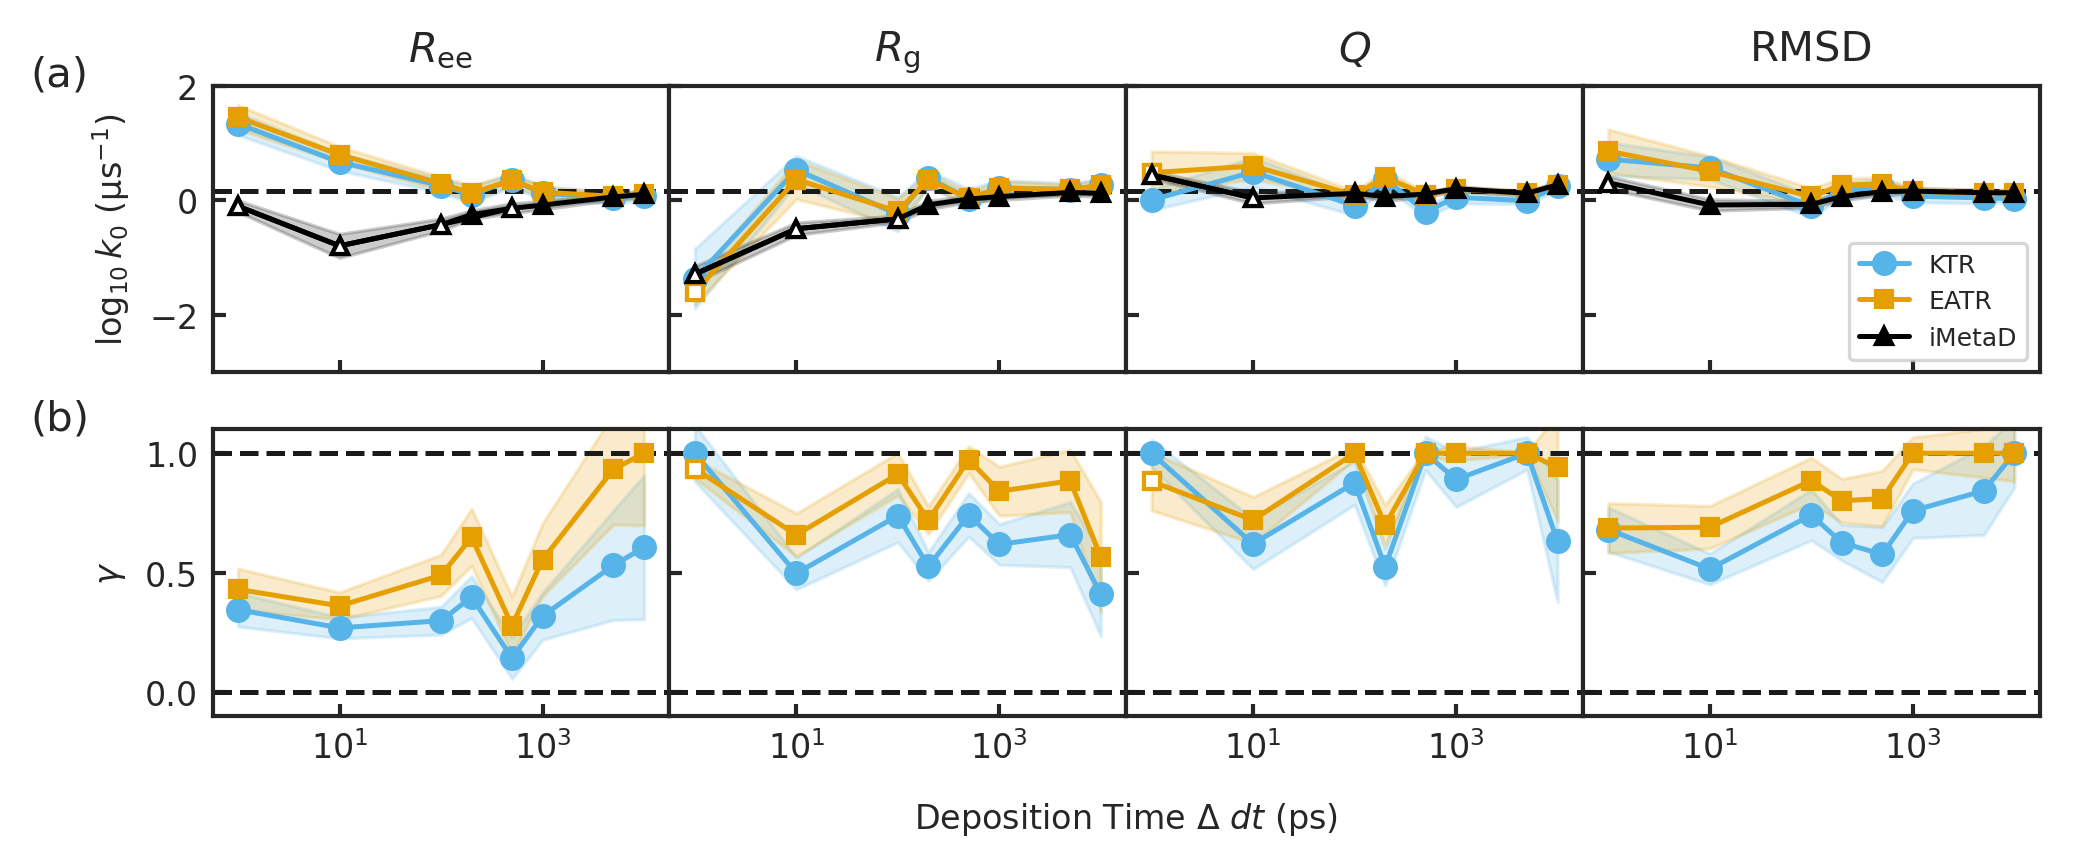

In [5]:
fig, axs = plt.subplots(2,4,figsize=(7,3),dpi=300,sharey='row',sharex=True)
fig.subplots_adjust(wspace=0,bottom=0.18,left=0.10,right=0.97)

# Rates

axs[0,0].set_ylabel('$\log_{10} k_0$ ($\mathrm{\mu s}^{-1}$)')
axs[0,0].set_xscale('log')
axs[0,0].set_xlim((5.62e-1,1.78e4))
axs[0,0].set_ylim((-3,2))

axs[0,0].axhline(y=np.log10(true),color='k',linestyle='--')
axs[0,0].fill_between(paces,np.log10(np.array(E_rates_data_u["KTR Vmb CDF k"])*1e6)-E_rates_data_u["KTR Vmb CDF std k"],np.log10(np.array(E_rates_data_u["KTR Vmb CDF k"])*1e6)+E_rates_data_u["KTR Vmb CDF std k"],color='#56B4E9',alpha=0.2)
axs[0,0].plot(np.array(pace)/100,np.log10(np.array(E_rates_data_u["KTR Vmb CDF k"])*1e6),marker='o',markersize=5,color='#56B4E9')
axs[0,0].fill_between(paces,np.log10(np.array(E_rates_data_u["EATR CDF k"])*1e6)-E_rates_data_u["EATR CDF std k"],np.log10(np.array(E_rates_data_u["EATR CDF k"])*1e6)+E_rates_data_u["EATR CDF std k"],color='#E69F00',alpha=0.2)
axs[0,0].plot(np.array(pace)/100,np.log10(np.array(E_rates_data_u["EATR CDF k"])*1e6),marker='s',color='#E69F00')
axs[0,0].fill_between(paces,np.log10(np.array(E_rates_data_u["iMetaD CDF k"])*1e6)-E_rates_data_u["iMetaD CDF std k"],np.log10(np.array(E_rates_data_u["iMetaD CDF k"])*1e6)+E_rates_data_u["iMetaD CDF std k"],color='#000000',alpha=0.2)
axs[0,0].plot(np.array(pace)/100,np.log10(np.array(E_rates_data_u["iMetaD CDF k"])*1e6),marker='^',color='#000000')
axs[0,0].plot(np.array(pace[:3]+[pace[4]])/100,np.log10(np.array(E_rates_data_u["iMetaD CDF k"][:3]+[E_rates_data_u["iMetaD CDF k"][4]])*1e6),marker='^',mfc='#FFFFFF',color='#000000')
axs[0,0].set_title('$R_{\mathrm{ee}}$')
axs[0,0].text(-0.4,1.0,"(a)",fontsize=10,transform=axs[0,0].transAxes)

axs[0,1].axhline(y=np.log10(true),color='k',linestyle='--')
axs[0,1].fill_between(paces,np.log10(np.array(G_rates_data_u["KTR Vmb CDF k"])*1e6)-G_rates_data_u["KTR Vmb CDF std k"],np.log10(np.array(G_rates_data_u["KTR Vmb CDF k"])*1e6)+G_rates_data_u["KTR Vmb CDF std k"],color='#56B4E9',alpha=0.2)
axs[0,1].plot(np.array(pace)/100,np.log10(np.array(G_rates_data_u["KTR Vmb CDF k"])*1e6),marker='o',markersize=5,color='#56B4E9')
axs[0,1].fill_between(paces,np.log10(np.array(G_rates_data_u["EATR CDF k"])*1e6)-G_rates_data_u["EATR CDF std k"],np.log10(np.array(G_rates_data_u["EATR CDF k"])*1e6)+G_rates_data_u["EATR CDF std k"],color='#E69F00',alpha=0.2)
axs[0,1].plot(np.array(pace)/100,np.log10(np.array(G_rates_data_u["EATR CDF k"])*1e6),marker='s',color='#E69F00')
axs[0,1].plot(np.array(pace[:1])/100,np.log10(np.array(G_rates_data_u["EATR CDF k"][:1])*1e6),marker='s',mfc='#FFFFFF',color='#E69F00')
axs[0,1].fill_between(paces,np.log10(np.array(G_rates_data_u["iMetaD CDF k"])*1e6)-G_rates_data_u["iMetaD CDF std k"],np.log10(np.array(G_rates_data_u["iMetaD CDF k"])*1e6)+G_rates_data_u["iMetaD CDF std k"],color='#000000',alpha=0.2)
axs[0,1].plot(np.array(pace)/100,np.log10(np.array(G_rates_data_u["iMetaD CDF k"])*1e6),marker='^',color='#000000')
axs[0,1].plot(np.array(pace[:3])/100,np.log10(np.array(G_rates_data_u["iMetaD CDF k"][:3])*1e6),marker='^',mfc='#FFFFFF',color='#000000')
axs[0,1].set_title('$R_{\mathrm{g}}$')

axs[0,2].axhline(y=np.log10(true),color='k',linestyle='--')
axs[0,2].fill_between(paces,np.log10(np.array(Q_rates_data_u["KTR Vmb CDF k"])*1e6)-Q_rates_data_u["KTR Vmb CDF std k"],np.log10(np.array(Q_rates_data_u["KTR Vmb CDF k"])*1e6)+Q_rates_data_u["KTR Vmb CDF std k"],color='#56B4E9',alpha=0.2)
axs[0,2].plot(np.array(pace)/100,np.log10(np.array(Q_rates_data_u["KTR Vmb CDF k"])*1e6),marker='o',markersize=5,color='#56B4E9')
axs[0,2].fill_between(paces,np.log10(np.array(Q_rates_data_u["EATR CDF k"])*1e6)-Q_rates_data_u["EATR CDF std k"],np.log10(np.array(Q_rates_data_u["EATR CDF k"])*1e6)+Q_rates_data_u["EATR CDF std k"],color='#E69F00',alpha=0.2)
axs[0,2].plot(np.array(pace)/100,np.log10(np.array(Q_rates_data_u["EATR CDF k"])*1e6),marker='s',color='#E69F00')
axs[0,2].plot(np.array(pace[0])/100,np.log10(np.array(Q_rates_data_u["EATR CDF k"][0])*1e6),marker='s',mfc='#FFFFFF',color='#E69F00')
axs[0,2].fill_between(paces,np.log10(np.array(Q_rates_data_u["iMetaD CDF k"])*1e6)-Q_rates_data_u["iMetaD CDF std k"],np.log10(np.array(Q_rates_data_u["iMetaD CDF k"])*1e6)+Q_rates_data_u["iMetaD CDF std k"],color='#000000',alpha=0.2)
axs[0,2].plot(np.array(pace)/100,np.log10(np.array(Q_rates_data_u["iMetaD CDF k"])*1e6),marker='^',color='#000000')
axs[0,2].plot(np.array(pace[:2])/100,np.log10(np.array(Q_rates_data_u["iMetaD CDF k"][:2])*1e6),marker='^',mfc='#FFFFFF',color='#000000')
axs[0,2].set_title('$Q$')

axs[0,3].axhline(y=np.log10(true),color='k',linestyle='--')
axs[0,3].fill_between(paces,np.log10(np.array(R_rates_data_u["KTR Vmb CDF k"])*1e6)-R_rates_data_u["KTR Vmb CDF std k"],np.log10(np.array(R_rates_data_u["KTR Vmb CDF k"])*1e6)+R_rates_data_u["KTR Vmb CDF std k"],color='#56B4E9',alpha=0.2)
axs[0,3].plot(np.array(pace)/100,np.log10(np.array(R_rates_data_u["KTR Vmb CDF k"])*1e6),marker='o',markersize=5,color='#56B4E9',label='KTR')
axs[0,3].fill_between(paces,np.log10(np.array(R_rates_data_u["EATR CDF k"])*1e6)-R_rates_data_u["EATR CDF std k"],np.log10(np.array(R_rates_data_u["EATR CDF k"])*1e6)+R_rates_data_u["EATR CDF std k"],color='#E69F00',alpha=0.2)
axs[0,3].plot(np.array(pace)/100,np.log10(np.array(R_rates_data_u["EATR CDF k"])*1e6),marker='s',color='#E69F00',label='EATR')
axs[0,3].fill_between(paces,np.log10(np.array(R_rates_data_u["iMetaD CDF k"])*1e6)-R_rates_data_u["iMetaD CDF std k"],np.log10(np.array(R_rates_data_u["iMetaD CDF k"])*1e6)+R_rates_data_u["iMetaD CDF std k"],color='#000000',alpha=0.2)
axs[0,3].plot(np.array(pace)/100,np.log10(np.array(R_rates_data_u["iMetaD CDF k"])*1e6),marker='^',color='#000000',label='iMetaD')
axs[0,3].plot(np.array(pace[:1])/100,np.log10(np.array(R_rates_data_u["iMetaD CDF k"][:1])*1e6),marker='^',mfc='#FFFFFF',color='#000000')
axs[0,3].set_title('RMSD')
axs[0,3].legend(loc="lower right")

# Gamma

axs[1,0].set_ylabel('$\gamma$')
axs[1,0].set_xscale('log')
axs[1,0].set_ylim((-0.1,1.1))

axs[1,0].axhline(y=1,color='k',linestyle='--')
axs[1,0].axhline(y=0,color='k',linestyle='--')
axs[1,0].fill_between(paces,np.array(E_rates_data_u["KTR Vmb CDF g"])-E_rates_data_u["KTR Vmb CDF std g"],np.array(E_rates_data_u["KTR Vmb CDF g"])+E_rates_data_u["KTR Vmb CDF std g"],color='#56B4E9',alpha=0.2)
axs[1,0].plot(np.array(pace)/100,np.array(E_rates_data_u["KTR Vmb CDF g"]),marker='o',markersize=5,color='#56B4E9')
axs[1,0].fill_between(paces,np.array(E_rates_data_u["EATR CDF g"])-E_rates_data_u["EATR CDF std g"],np.array(E_rates_data_u["EATR CDF g"])+E_rates_data_u["EATR CDF std g"],color='#E69F00',alpha=0.2)
axs[1,0].plot(np.array(pace)/100,np.array(E_rates_data_u["EATR CDF g"]),marker='s',color='#E69F00')
axs[1,0].text(-0.4,1.0,"(b)",fontsize=10,transform=axs[1,0].transAxes)

axs[1,1].axhline(y=1,color='k',linestyle='--')
axs[1,1].axhline(y=0,color='k',linestyle='--')
axs[1,1].fill_between(paces,np.array(G_rates_data_u["KTR Vmb CDF g"])-G_rates_data_u["KTR Vmb CDF std g"],np.array(G_rates_data_u["KTR Vmb CDF g"])+G_rates_data_u["KTR Vmb CDF std g"],color='#56B4E9',alpha=0.2)
axs[1,1].plot(np.array(pace)/100,np.array(G_rates_data_u["KTR Vmb CDF g"]),marker='o',markersize=5,color='#56B4E9')
axs[1,1].fill_between(paces,np.array(G_rates_data_u["EATR CDF g"])-G_rates_data_u["EATR CDF std g"],np.array(G_rates_data_u["EATR CDF g"])+G_rates_data_u["EATR CDF std g"],color='#E69F00',alpha=0.2)
axs[1,1].plot(np.array(pace)/100,np.array(G_rates_data_u["EATR CDF g"]),marker='s',color='#E69F00')
axs[1,1].plot(np.array(pace[:1])/100,np.array(G_rates_data_u["EATR CDF g"][:1]),marker='s',mfc='#FFFFFF',color='#E69F00')

axs[1,2].axhline(y=1,color='k',linestyle='--')
axs[1,2].axhline(y=0,color='k',linestyle='--')
axs[1,2].fill_between(paces,np.array(Q_rates_data_u["KTR Vmb CDF g"])-Q_rates_data_u["KTR Vmb CDF std g"],np.array(Q_rates_data_u["KTR Vmb CDF g"])+Q_rates_data_u["KTR Vmb CDF std g"],color='#56B4E9',alpha=0.2)
axs[1,2].plot(np.array(pace)/100,np.array(Q_rates_data_u["KTR Vmb CDF g"]),marker='o',markersize=5,color='#56B4E9',label="KTR")
axs[1,2].fill_between(paces,np.array(Q_rates_data_u["EATR CDF g"])-Q_rates_data_u["EATR CDF std g"],np.array(Q_rates_data_u["EATR CDF g"])+Q_rates_data_u["EATR CDF std g"],color='#E69F00',alpha=0.2)
axs[1,2].plot(np.array(pace)/100,np.array(Q_rates_data_u["EATR CDF g"]),marker='s',color='#E69F00',label="EATR")
axs[1,2].plot(np.array(pace[0])/100,np.array(Q_rates_data_u["EATR CDF g"][0]),marker='s',mfc='#FFFFFF',color='#E69F00')

axs[1,3].axhline(y=1,color='k',linestyle='--')
axs[1,3].axhline(y=0,color='k',linestyle='--')
axs[1,3].fill_between(paces,np.array(R_rates_data_u["KTR Vmb CDF g"])-R_rates_data_u["KTR Vmb CDF std g"],np.array(R_rates_data_u["KTR Vmb CDF g"])+R_rates_data_u["KTR Vmb CDF std g"],color='#56B4E9',alpha=0.2)
axs[1,3].plot(np.array(pace)/100,np.array(R_rates_data_u["KTR Vmb CDF g"]),marker='o',markersize=5,color='#56B4E9')
axs[1,3].fill_between(paces,np.array(R_rates_data_u["EATR CDF g"])-R_rates_data_u["EATR CDF std g"],np.array(R_rates_data_u["EATR CDF g"])+R_rates_data_u["EATR CDF std g"],color='#E69F00',alpha=0.2)
axs[1,3].plot(np.array(pace)/100,np.array(R_rates_data_u["EATR CDF g"]),marker='s',color='#E69F00')

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

for ax in axs.flatten():
    ax.tick_params(axis='both', direction='in', which='both', length=3)
plt.xlabel('Deposition Time $\Delta~dt$ (ps)')

plt.savefig("EATR_FigS4.pdf",format='pdf')

## Figure S6: $\gamma$/$k_0$ Pairs That Fit

In [6]:
def get_EATR_CDF(k0, gamma, beta, directory, colvar_name, log_name, plog_len, biascol, t=None):
    print(f"{directory}")
    colvars = []
    plogs = []
    runs = [f"run_{i+1}" for i in range(100)]
    for run in runs:
        colvars.append(f"{directory}/{run}/{colvar_name}")
        plogs.append(f"{directory}/{run}/{log_name}")
        
    colvars_count = len(colvars)
    colvars_maxrow_count = None
    
    data = []
    times = []
    for colvar in colvars:
        data.append(np.loadtxt(colvar))
        times.append(data[-1][-1][0])
        colvars_maxrow_count = data[-1].shape[0] if colvars_maxrow_count is None or colvars_maxrow_count < data[-1].shape[0] else colvars_maxrow_count
    
    event = []
    for plog in plogs:
        with open(plog,'r') as f:
            if len(f.readlines()) > plog_len:
                event.append(True)
            else:
                event.append(False)
    event = np.array(event)
    M = event.sum()
    
    times = np.sort(times)
    v_data, ix_col = RM.inst_bias(data, colvars_count, colvars_maxrow_count, beta, biascol)
    spline = RM.EATR_calculate_avg_acc(gamma, v_data, beta, ix_col)
    if t is not None:
        return times, RM.EATR_CDF(t, k0, gamma, spline, 1), M
    return times, RM.EATR_CDF(times, k0, gamma, spline, 1), M

def just_times(directory, colvar_name, log_name, plog_len):
    
    colvars = []
    plogs = []
    runs = [f"run_{i+1}" for i in range(100)]
    for run in runs:
        colvars.append(f"{directory}/{run}/{colvar_name}")
        plogs.append(f"{directory}/{run}/{log_name}")
    
    times = []
    for colvar in colvars:
        times.append(np.loadtxt(colvar)[-1][0])
    times = np.array(times)
        
    event = []
    for plog in plogs:
        with open(plog,'r') as f:
            if len(f.readlines()) > plog_len:
                event.append(True)
            else:
                event.append(False)
    event = np.array(event)
        
    return np.sort(times[event]), event.sum()

In [7]:
directory = "../../Data/L_lda_wt/lruns_pace1e3"

gammas = np.concatenate((np.arange(0.,0.25,0.08),np.array([1.])))
print(gammas)

ecdfx, M = just_times(directory, 'metad_short.colvar', 'p.log', 169)
ecdfy = np.arange(1, M + 1) / 100.
ecdf_data_L = np.column_stack((ecdfx, ecdfy))

ts_L = 10**np.linspace(3,5,100)

colvars = []
runs = [f"run_{i+1}" for i in range(100)]
for run in runs:
    colvars.append(f"{directory}/{run}/metad_short.colvar")
colvars_count = len(colvars)
colvars_maxrow_count = None
data = []
for colvar in colvars:
    data.append(np.loadtxt(colvar))
    colvars_maxrow_count = data[-1].shape[0] if colvars_maxrow_count is None or colvars_maxrow_count < data[-1].shape[0] else colvars_maxrow_count

v_data, ix_col = RM.inst_bias(data, colvars_count, colvars_maxrow_count, 0.3855097673, 2)

[0.   0.08 0.16 0.24 1.  ]


In [8]:
tcdf_ys_L = []

def tcdf(t, k0, gamma):
    spline = RM.EATR_calculate_avg_acc(gamma, v_data, 0.3855097673, ix_col)
    return RM.EATR_CDF(t, k0, gamma, spline, 1)

for gamma in gammas:
    cdf_result = optimize.curve_fit(tcdf, ecdf_data_L[:,0], ecdf_data_L[:,1], p0=(1e-5,gamma), bounds=([1e-8,gamma-0.0000001],[1e-3,gamma]))
    cdf_result = cdf_result[0]
    tcdf_ys_L.append(tcdf(ts_L,cdf_result[0],cdf_result[1]))
    print(f"gamma: {cdf_result[1]}, k0: {cdf_result[0]}")

gamma: -1.850970492219394e-15, k0: 0.00010321864071921496
gamma: 0.07999999999999999, k0: 6.229683912477863e-05
gamma: 0.15999990000091693, k0: 3.5866017538700606e-05
gamma: 0.23999990039956862, k0: 1.973645064104868e-05
gamma: 0.9999999000129672, k0: 1.3908786630081995e-08


In [9]:
directory = "../../Data/R_RMSD_wt/rruns_pace1e5"

gammas = [0.48,0.64,0.80,0.96,1.00]
print(gammas)

ecdfx, M = just_times(directory, 'metad.colvar', 'p.log', 159)
ecdfy = np.arange(1, M + 1) / 100.
ecdf_data_R = np.column_stack((ecdfx, ecdfy))

ts_R = 10**np.linspace(4,5.5,100)

colvars = []
runs = [f"run_{i+1}" for i in range(100)]
for run in runs:
    colvars.append(f"{directory}/{run}/metad.colvar")
colvars_count = len(colvars)
colvars_maxrow_count = None
data = []
for colvar in colvars:
    data.append(np.loadtxt(colvar))
    colvars_maxrow_count = data[-1].shape[0] if colvars_maxrow_count is None or colvars_maxrow_count < data[-1].shape[0] else colvars_maxrow_count

v_data, ix_col = RM.inst_bias(data, colvars_count, colvars_maxrow_count, 0.3855097673, 2)

[0.48, 0.64, 0.8, 0.96, 1.0]


In [10]:
tcdf_ys_R = []

def tcdf(t, k0, gamma):
    spline = RM.EATR_calculate_avg_acc(gamma, v_data, 0.3855097673, ix_col)
    return RM.EATR_CDF(t, k0, gamma, spline, 1)

for gamma in gammas:
    cdf_result = optimize.curve_fit(tcdf, ecdf_data_R[:,0], ecdf_data_R[:,1], p0=(1e-5,gamma), bounds=([1e-8,gamma-0.0000001],[1e-3,gamma]))
    cdf_result = cdf_result[0]
    tcdf_ys_R.append(tcdf(ts_R,cdf_result[0],cdf_result[1]))
    print(f"gamma: {cdf_result[1]}, k0: {cdf_result[0]}")

gamma: 0.47999999880558475, k0: 3.9148109555485735e-06
gamma: 0.6399999974958429, k0: 2.972882860679323e-06
gamma: 0.7999999980447805, k0: 2.2044952663498083e-06
gamma: 0.9599999975727896, k0: 1.5976640468395964e-06
gamma: 0.9999999999886359, k0: 1.4689907302486968e-06


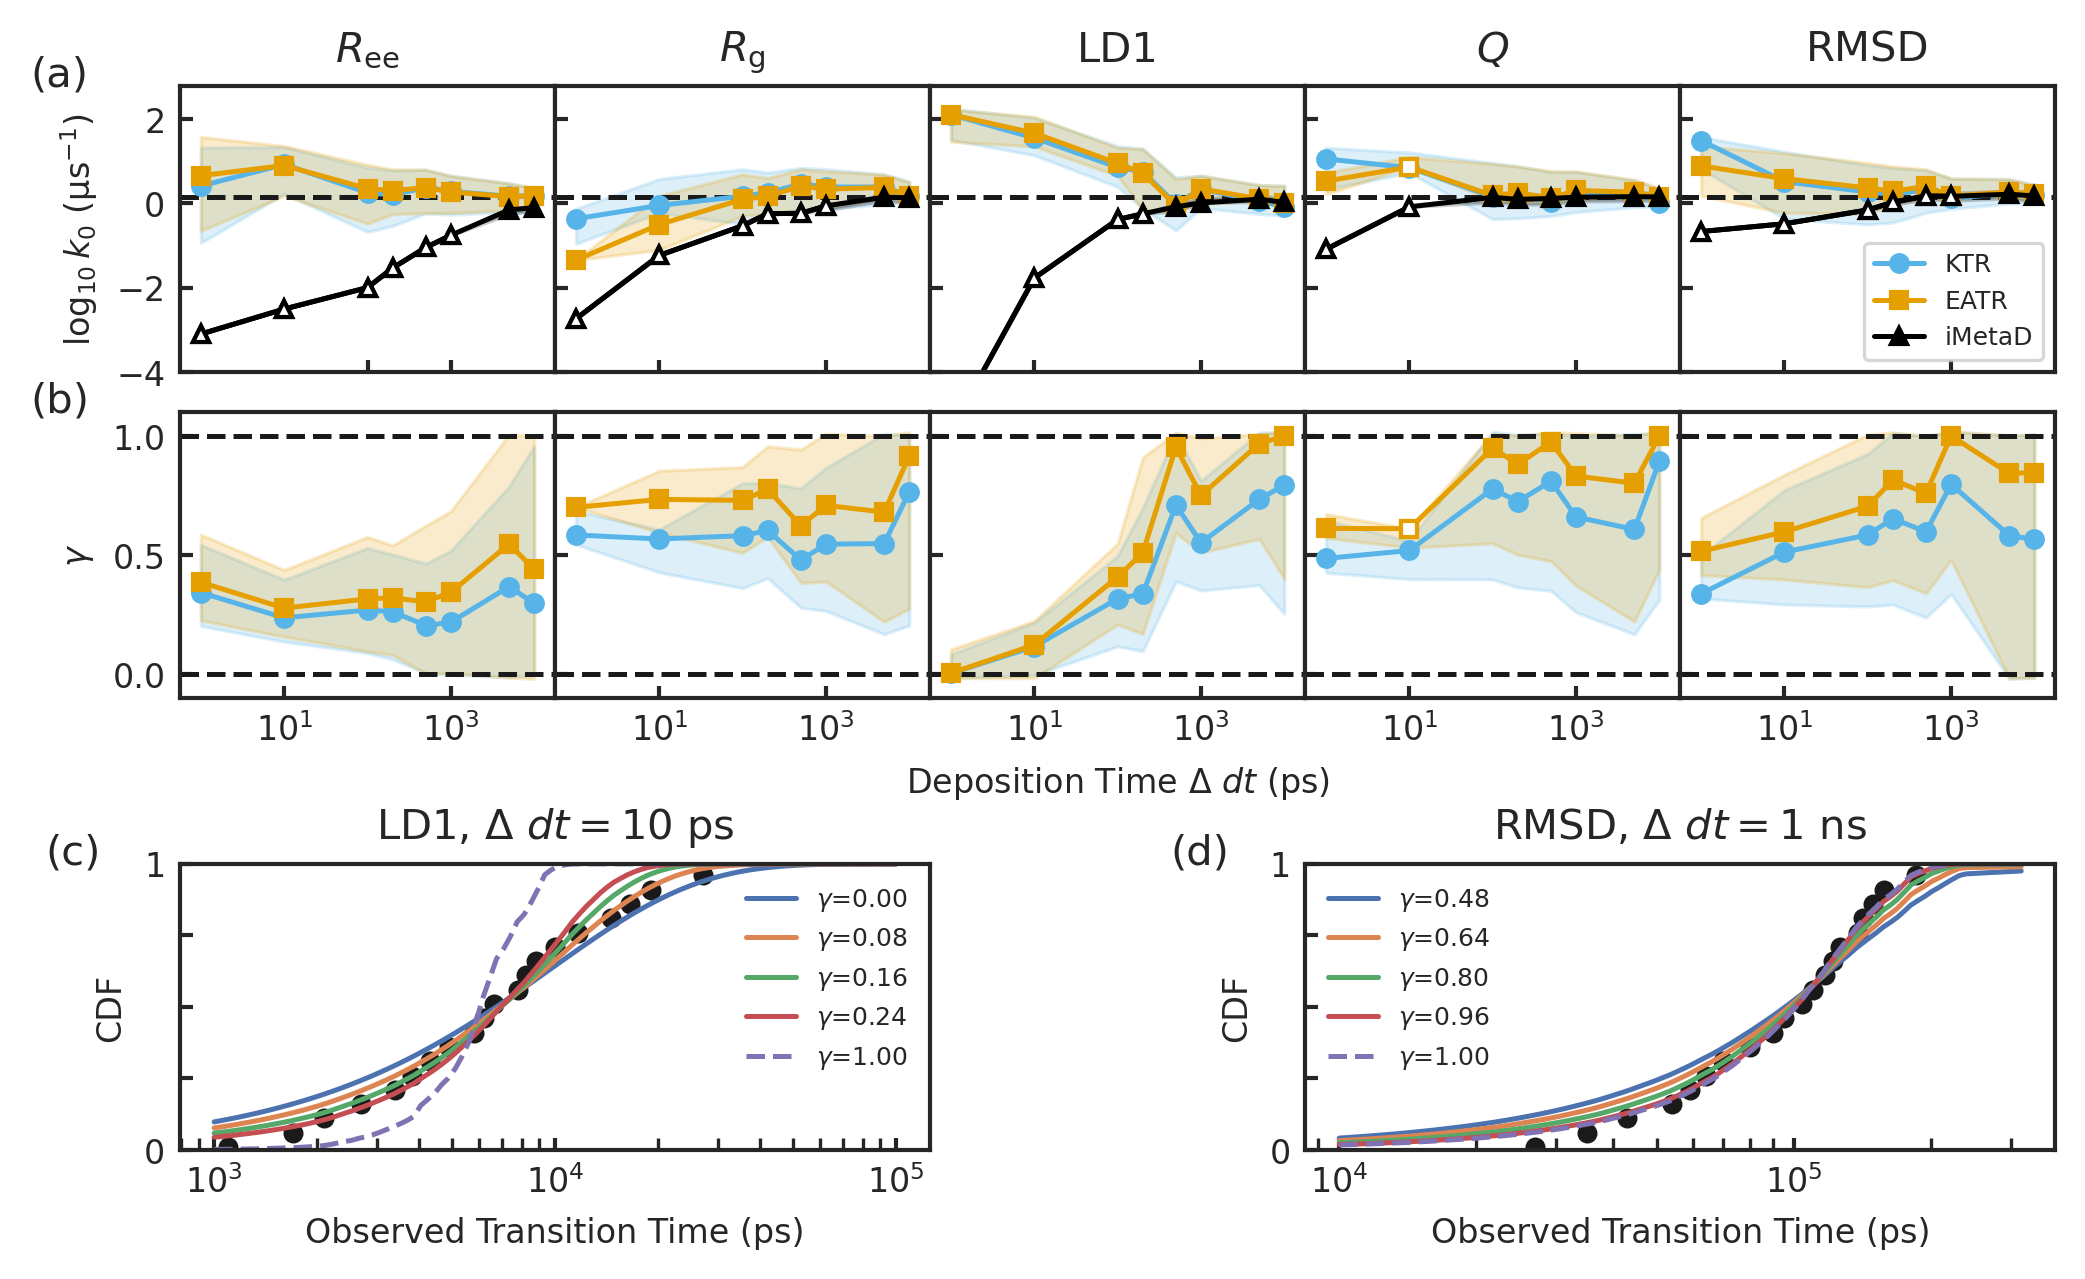

In [12]:
layout = [["Ek","Gk","Lk","Qk","Rk"],
          ["Eg","Gg","Lg","Qg","Rg"],
          [".",".",".",".","."],
          ["LCDF","LCDF",".","RCDF","RCDF"]]

fig, axs = plt.subplot_mosaic(layout,figsize=(7,4.5),dpi=300,height_ratios=[1,1,0.3,1])
fig.subplots_adjust(wspace=0,hspace=0.169,top=0.908,bottom=0.12,left=0.074,right=0.967)

paces = np.array(pace)/100

# Rates

axs["Ek"].set_ylabel('$\log_{10} k_0$ ($\mathrm{\mu s}^{-1}$)')
axs["Ek"].set_xscale('log')
axs["Ek"].set_xlim((5.62e-1,1.78e4))
axs["Ek"].set_xticks([100,1000],labels=["",""])
axs["Ek"].set_ylim((-4,np.log10(600)))
axs["Ek"].set_yticks([-4,-2,0,2])
axs["Ek"].axhline(y=np.log10(true),color='k',linestyle='--')
axs["Ek"].plot(paces,np.log10(np.array(E_rates_data["KTR Vmb CDF k"])*1e6),marker='o',markersize=4,color='#56B4E9')
axs["Ek"].fill_between(paces,np.log10(np.array(E_rates_data["KTR Vmb CDF KS klo"])*1e6),np.log10(np.array(E_rates_data["KTR Vmb CDF KS khi"])*1e6),color='#56B4E9',alpha=0.2)
axs["Ek"].plot(paces,np.log10(np.array(E_rates_data["EATR CDF k"])*1e6),marker='s',color='#E69F00')
axs["Ek"].fill_between(paces,np.log10(np.array(E_rates_data["EATR CDF KS klo"])*1e6),np.log10(np.array(E_rates_data["EATR CDF KS khi"])*1e6),color='#E69F00',alpha=0.2)
axs["Ek"].plot(paces,np.log10(np.array(E_rates_data["iMetaD CDF k"])*1e6),marker='^',color='#000000')
axs["Ek"].fill_between(paces,np.log10(np.array(E_rates_data["iMetaD CDF KS klo"])*1e6),np.log10(np.array(E_rates_data["iMetaD CDF KS khi"])*1e6),color='#000000',alpha=0.2)
axs["Ek"].plot(paces[:6],np.log10(np.array(E_rates_data["iMetaD CDF k"][:6])*1e6),marker='^',mfc='#FFFFFF',color='#000000')
axs["Ek"].set_title('$R_{\mathrm{ee}}$')
axs["Ek"].text(-0.4,1.0,"(a)",fontsize=10,transform=axs["Ek"].transAxes)

axs["Gk"].set_xscale('log')
axs["Gk"].set_xlim((5.62e-1,1.78e4))
axs["Gk"].set_xticks([10,1000],labels=["",""])
axs["Gk"].set_ylim((-4,np.log10(600)))
axs["Gk"].set_yticks([-4,-2,0,2],labels=['','','',''])
axs["Gk"].axhline(y=np.log10(true),color='k',linestyle='--')
axs["Gk"].plot(paces,np.log10(np.array(G_rates_data["KTR Vmb CDF k"])*1e6),marker='o',markersize=4,color='#56B4E9')
axs["Gk"].fill_between(paces,np.log10(np.array(G_rates_data["KTR Vmb CDF KS klo"])*1e6),np.log10(np.array(G_rates_data["KTR Vmb CDF KS khi"])*1e6),color='#56B4E9',alpha=0.2)
axs["Gk"].plot(paces,np.log10(np.array(G_rates_data["EATR CDF k"])*1e6),marker='s',color='#E69F00')
axs["Gk"].fill_between(paces,np.log10(np.array(G_rates_data["EATR CDF KS klo"])*1e6),np.log10(np.array(G_rates_data["EATR CDF KS khi"])*1e6),color='#E69F00',alpha=0.2)
axs["Gk"].plot(paces,np.log10(np.array(G_rates_data["iMetaD CDF k"])*1e6),marker='^',color='#000000')
axs["Gk"].fill_between(paces,np.log10(np.array(G_rates_data["iMetaD CDF KS klo"])*1e6),np.log10(np.array(G_rates_data["iMetaD CDF KS khi"])*1e6),color='#000000',alpha=0.2)
axs["Gk"].plot(paces[:6],np.log10(np.array(G_rates_data["iMetaD CDF k"][:6])*1e6),marker='^',mfc='#FFFFFF',color='#000000')
axs["Gk"].set_title('$R_{\mathrm{g}}$')

axs["Lk"].set_xscale('log')
axs["Lk"].set_xlim((5.62e-1,1.78e4))
axs["Lk"].set_xticks([10,1000],labels=[" "," "])
axs["Lk"].set_ylim((-4,np.log10(600)))
axs["Lk"].set_yticks([-4,-2,0,2],labels=['','','',''])
axs["Lk"].axhline(y=np.log10(true),color='k',linestyle='--')
axs["Lk"].plot(paces,np.log10(np.array(L_rates_data["KTR Vmb CDF k"])*1e6),marker='o',markersize=4,color='#56B4E9')
axs["Lk"].fill_between(paces,np.log10(np.array(L_rates_data["KTR Vmb CDF KS klo"])*1e6),np.log10(np.array(L_rates_data["KTR Vmb CDF KS khi"])*1e6),color='#56B4E9',alpha=0.2)
axs["Lk"].plot(paces,np.log10(np.array(L_rates_data["EATR CDF k"])*1e6),marker='s',color='#E69F00')
axs["Lk"].fill_between(paces,np.log10(np.array(L_rates_data["EATR CDF KS klo"])*1e6),np.log10(np.array(L_rates_data["EATR CDF KS khi"])*1e6),color='#E69F00',alpha=0.2)
axs["Lk"].plot(paces,np.log10(np.array(L_rates_data["iMetaD CDF k"])*1e6),marker='^',color='#000000')
axs["Lk"].fill_between(paces,np.log10(np.array(L_rates_data["iMetaD CDF KS klo"])*1e6),np.log10(np.array(L_rates_data["iMetaD CDF KS khi"])*1e6),color='#000000',alpha=0.2)
axs["Lk"].plot(paces[:4],np.log10(np.array(L_rates_data["iMetaD CDF k"][:4])*1e6),marker='^',mfc='#FFFFFF',color='#000000')
axs["Lk"].set_title('LD1')

axs["Qk"].set_xscale('log')
axs["Qk"].set_xlim((5.62e-1,1.78e4))
axs["Qk"].set_xticks([10,1000],labels=["",""])
axs["Qk"].set_ylim((-4,np.log10(600)))
axs["Qk"].set_yticks([-4,-2,0,2],labels=['','','',''])
axs["Qk"].axhline(y=np.log10(true),color='k',linestyle='--')
axs["Qk"].plot(paces,np.log10(np.array(Q_rates_data["KTR Vmb CDF k"])*1e6),marker='o',markersize=4,color='#56B4E9')
axs["Qk"].fill_between(paces,np.log10(np.array(Q_rates_data["KTR Vmb CDF KS klo"])*1e6),np.log10(np.array(Q_rates_data["KTR Vmb CDF KS khi"])*1e6),color='#56B4E9',alpha=0.2)
axs["Qk"].plot(paces,np.log10(np.array(Q_rates_data["EATR CDF k"])*1e6),marker='s',color='#E69F00')
axs["Qk"].fill_between(paces,np.log10(np.array(Q_rates_data["EATR CDF KS klo"])*1e6),np.log10(np.array(Q_rates_data["EATR CDF KS khi"])*1e6),color='#E69F00',alpha=0.2)
axs["Qk"].plot(paces[1],np.log10(np.array(Q_rates_data["EATR CDF k"][1])*1e6),marker='s',mfc='#FFFFFF',color='#E69F00')
axs["Qk"].plot(paces,np.log10(np.array(Q_rates_data["iMetaD CDF k"])*1e6),marker='^',color='#000000')
axs["Qk"].fill_between(paces,np.log10(np.array(Q_rates_data["iMetaD CDF KS klo"])*1e6),np.log10(np.array(Q_rates_data["iMetaD CDF KS khi"])*1e6),color='#000000',alpha=0.2)
axs["Qk"].plot(paces[:2],np.log10(np.array(Q_rates_data["iMetaD CDF k"][:2])*1e6),marker='^',mfc='#FFFFFF',color='#000000')
axs["Qk"].set_title('$Q$')

axs["Rk"].set_xscale('log')
axs["Rk"].set_xlim((5.62e-1,1.78e4))
axs["Rk"].set_xticks([10,1000],labels=["",""])
axs["Rk"].set_ylim((-4,np.log10(600)))
axs["Rk"].set_yticks([-4,-2,0,2],labels=['','','',''])
axs["Rk"].axhline(y=np.log10(true),color='k',linestyle='--')
axs["Rk"].plot(paces,np.log10(np.array(R_rates_data["KTR Vmb CDF k"])*1e6),marker='o',markersize=4,color='#56B4E9',label='KTR')
axs["Rk"].fill_between(paces,np.log10(np.array(R_rates_data["KTR Vmb CDF KS klo"])*1e6),np.log10(np.array(R_rates_data["KTR Vmb CDF KS khi"])*1e6),color='#56B4E9',alpha=0.2)
axs["Rk"].plot(paces,np.log10(np.array(R_rates_data["EATR CDF k"])*1e6),marker='s',color='#E69F00',label='EATR')
axs["Rk"].fill_between(paces,np.log10(np.array(R_rates_data["EATR CDF KS klo"])*1e6),np.log10(np.array(R_rates_data["EATR CDF KS khi"])*1e6),color='#E69F00',alpha=0.2)
axs["Rk"].plot(paces,np.log10(np.array(R_rates_data["iMetaD CDF k"])*1e6),marker='^',color='#000000',label='iMetaD')
axs["Rk"].fill_between(paces,np.log10(np.array(R_rates_data["iMetaD CDF KS klo"])*1e6),np.log10(np.array(R_rates_data["iMetaD CDF KS khi"])*1e6),color='#000000',alpha=0.2)
axs["Rk"].plot(paces[:6],np.log10(np.array(R_rates_data["iMetaD CDF k"][:6])*1e6),marker='^',mfc='#FFFFFF',color='#000000')
axs["Rk"].set_title('RMSD')
axs["Rk"].legend(loc="lower right")

# Gamma

axs["Eg"].set_ylabel('$\gamma$')
axs["Eg"].set_xscale('log')
axs["Eg"].set_ylim((-0.1,1.1))
axs["Eg"].set_xlim((5.62e-1,1.78e4))
axs["Eg"].set_yticks([0,0.5,1])
axs["Eg"].set_xticks([10,1000])
axs["Eg"].axhline(y=1,color='k',linestyle='--')
axs["Eg"].axhline(y=0,color='k',linestyle='--')
axs["Eg"].plot(paces,np.array(E_rates_data["KTR Vmb CDF g"]),marker='o',markersize=4,color='#56B4E9')
axs["Eg"].fill_between(paces,np.array(E_rates_data["KTR Vmb CDF KS glo"]),np.array(E_rates_data["KTR Vmb CDF KS ghi"]),color='#56B4E9',alpha=0.2)
axs["Eg"].plot(paces,np.array(E_rates_data["EATR CDF g"]),marker='s',color='#E69F00')
axs["Eg"].fill_between(paces,np.array(E_rates_data["EATR CDF KS glo"]),np.array(E_rates_data["EATR CDF KS ghi"]),color='#E69F00',alpha=0.2)
axs["Eg"].text(-0.4,1.0,"(b)",fontsize=10,transform=axs["Eg"].transAxes)

axs["Gg"].set_xscale('log')
axs["Gg"].set_ylim((-0.1,1.1))
axs["Gg"].set_xlim((5.62e-1,1.78e4))
axs["Gg"].set_yticks([0,0.5,1],labels=['','',''])
axs["Gg"].set_xticks([10,1000])
axs["Gg"].axhline(y=1,color='k',linestyle='--')
axs["Gg"].axhline(y=0,color='k',linestyle='--')
axs["Gg"].plot(paces,np.array(G_rates_data["KTR Vmb CDF g"]),marker='o',markersize=4,color='#56B4E9')
axs["Gg"].fill_between(paces,np.array(G_rates_data["KTR Vmb CDF KS glo"]),np.array(G_rates_data["KTR Vmb CDF KS ghi"]),color='#56B4E9',alpha=0.2)
axs["Gg"].plot(paces,np.array(G_rates_data["EATR CDF g"]),marker='s',color='#E69F00')
axs["Gg"].fill_between(paces,np.array(G_rates_data["EATR CDF KS glo"]),np.array(G_rates_data["EATR CDF KS ghi"]),color='#E69F00',alpha=0.2)

axs["Lg"].set_xscale('log')
axs["Lg"].set_ylim((-0.1,1.1))
axs["Lg"].set_xlim((5.62e-1,1.78e4))
axs["Lg"].set_yticks([0,0.5,1],labels=['','',''])
axs["Lg"].set_xticks([10,1000])
axs["Lg"].axhline(y=1,color='k',linestyle='--')
axs["Lg"].axhline(y=0,color='k',linestyle='--')
axs["Lg"].plot(paces,np.array(L_rates_data["KTR Vmb CDF g"]),marker='o',markersize=4,color='#56B4E9')
axs["Lg"].fill_between(paces,np.array(L_rates_data["KTR Vmb CDF KS glo"]),np.array(L_rates_data["KTR Vmb CDF KS ghi"]),color='#56B4E9',alpha=0.2)
axs["Lg"].plot(paces,np.array(L_rates_data["EATR CDF g"]),marker='s',color='#E69F00')
axs["Lg"].fill_between(paces,np.array(L_rates_data["EATR CDF KS glo"]),np.array(L_rates_data["EATR CDF KS ghi"]),color='#E69F00',alpha=0.2)
axs["Lg"].set_xlabel('Deposition Time $\Delta~dt$ (ps)')

axs["Qg"].set_xscale('log')
axs["Qg"].set_ylim((-0.1,1.1))
axs["Qg"].set_xlim((5.62e-1,1.78e4))
axs["Qg"].set_yticks([0,0.5,1],labels=['','',''])
axs["Qg"].set_xticks([10,1000])
axs["Qg"].axhline(y=1,color='k',linestyle='--')
axs["Qg"].axhline(y=0,color='k',linestyle='--')
axs["Qg"].plot(paces,np.array(Q_rates_data["KTR Vmb CDF g"]),marker='o',markersize=4,color='#56B4E9',label="KTR")
axs["Qg"].fill_between(paces,np.array(Q_rates_data["KTR Vmb CDF KS glo"]),np.array(Q_rates_data["KTR Vmb CDF KS ghi"]),color='#56B4E9',alpha=0.2)
axs["Qg"].plot(paces,np.array(Q_rates_data["EATR CDF g"]),marker='s',color='#E69F00',label="EATR")
axs["Qg"].fill_between(paces,np.array(Q_rates_data["EATR CDF KS glo"]),np.array(Q_rates_data["EATR CDF KS ghi"]),color='#E69F00',alpha=0.2)
axs["Qg"].plot(paces[1],np.array(Q_rates_data["EATR CDF g"][1]),marker='s',mfc='#FFFFFF',color='#E69F00')

axs["Rg"].set_xscale('log')
axs["Rg"].set_ylim((-0.1,1.1))
axs["Rg"].set_xlim((5.62e-1,1.78e4))
axs["Rg"].set_yticks([0,0.5,1],labels=['','',''])
axs["Rg"].set_xticks([10,1000])
axs["Rg"].axhline(y=1,color='k',linestyle='--')
axs["Rg"].axhline(y=0,color='k',linestyle='--')
axs["Rg"].plot(paces,np.array(R_rates_data["KTR Vmb CDF g"]),marker='o',markersize=4,color='#56B4E9')
axs["Rg"].fill_between(paces,np.array(R_rates_data["KTR Vmb CDF KS glo"]),np.array(R_rates_data["KTR Vmb CDF KS ghi"]),color='#56B4E9',alpha=0.2)
axs["Rg"].plot(paces,np.array(R_rates_data["EATR CDF g"]),marker='s',color='#E69F00')
axs["Rg"].fill_between(paces,np.array(R_rates_data["EATR CDF KS glo"]),np.array(R_rates_data["EATR CDF KS ghi"]),color='#E69F00',alpha=0.2)

axs["LCDF"].set_xscale("log")
axs["LCDF"].set_xlabel("Observed Transition Time (ps)")
axs["LCDF"].set_ylabel("CDF")
axs["LCDF"].set_yticks([0.0,0.25,0.5,0.75,1.0],labels=["0","","","","1"])
axs["LCDF"].set_ylim((0,1))
axs["LCDF"].set_title("LD1, $\Delta~dt=10$ ps")
axs["LCDF"].plot(ts_L,tcdf_ys_L[0],label='$\\gamma$=0.00')
axs["LCDF"].plot(ts_L,tcdf_ys_L[1],label='$\\gamma$=0.08')
axs["LCDF"].plot(ts_L,tcdf_ys_L[2],label='$\\gamma$=0.16')
axs["LCDF"].plot(ts_L,tcdf_ys_L[3],label='$\\gamma$=0.24')
axs["LCDF"].plot(ts_L,tcdf_ys_L[4],label='$\\gamma$=1.00',linestyle='--')
axs["LCDF"].scatter(ecdf_data_L[::5,0],ecdf_data_L[::5,1],color='k')
axs["LCDF"].legend(frameon=False)
axs["LCDF"].text(-0.18,1.0,"(c)",fontsize=10,transform=axs["LCDF"].transAxes)

axs["RCDF"].set_xscale("log")
axs["RCDF"].set_xlabel("Observed Transition Time (ps)")
axs["RCDF"].set_ylabel("CDF")
axs["RCDF"].set_yticks([0.0,0.25,0.5,0.75,1.0],labels=["0","","","","1"])
axs["RCDF"].set_ylim((0,1))
axs["RCDF"].set_title("RMSD, $\Delta~dt=1$ ns")
axs["RCDF"].plot(ts_R,tcdf_ys_R[0],label='$\\gamma$=0.48')
axs["RCDF"].plot(ts_R,tcdf_ys_R[1],label='$\\gamma$=0.64')
axs["RCDF"].plot(ts_R,tcdf_ys_R[2],label='$\\gamma$=0.80')
axs["RCDF"].plot(ts_R,tcdf_ys_R[3],label='$\\gamma$=0.96')
axs["RCDF"].plot(ts_R,tcdf_ys_R[4],label='$\\gamma$=1.00',linestyle='--')
axs["RCDF"].scatter(ecdf_data_R[::5,0],ecdf_data_R[::5,1],color='k')
axs["RCDF"].legend(frameon=False)
axs["RCDF"].text(-0.18,1.0,"(d)",fontsize=10,transform=axs["RCDF"].transAxes)

for ax in axs:
    axs[ax].tick_params(axis='both', direction='in', which='both', length=3)

plt.savefig("EATR_FigS6.pdf",format='pdf')